In [10]:

import numpy as np
import matplotlib.pyplot as plt

In [11]:
class SecondOrderODESolver:
    def __init__(self, coefficients, x_start, y_start, x_end, y_end, dx):
        self.coefficients = coefficients
        self.x_start = x_start
        self.y_start = y_start
        self.x_end = x_end
        self.y_end = y_end
        self.dx = dx
        self.num_points = int((x_end - x_start) / dx)
        self.alpha = [0]
        self.beta = [y_start]
        self.solution = None
        self.exact_solution = None

    def compute_coefficients(self, x):
        A = self.coefficients[0](x) / self.dx**2 + self.coefficients[1](x) / self.dx
        B = -2 * self.coefficients[0](x) / self.dx**2 - self.coefficients[1](x) / self.dx + self.coefficients[2](x)
        C = self.coefficients[0](x) / self.dx**2
        return A, B, C

    def solve(self):
        x_current = self.x_start
        for i in range(1, self.num_points):
            A, B, C = self.compute_coefficients(x_current + self.dx)
            update_coefficient = B + C * self.alpha[-1]
            self.alpha.append(-A / update_coefficient)
            self.beta.append(-C * self.beta[-1] / update_coefficient)
            x_current += self.dx

        y = [0] * (self.num_points - 1) + [self.y_end]
        for i in range(self.num_points - 1, 0, -1):
            y[i - 1] = self.alpha[i] * y[i] + self.beta[i]
        
        self.solution = y
        self.exact_solution = (
            1 - 1/6 * np.arange(self.x_start, self.x_end, self.dx)) * np.exp(np.arange(self.x_start, self.x_end, self.dx)
        )

    def plot_coefficients(self):
        x_values = np.arange(self.x_start, self.x_end, self.dx)
        plt.plot(x_values, self.alpha, label=r'$\alpha$')
        plt.plot(x_values, self.beta, label=r'$\beta$')
        plt.legend()
        plt.show()

    def plot_solution(self):
        x_values = np.arange(self.x_start, self.x_end, self.dx)
        plt.plot(x_values, self.solution, label='approx')
        plt.plot(x_values, self.exact_solution, label='exact')
        plt.legend()
        plt.show()


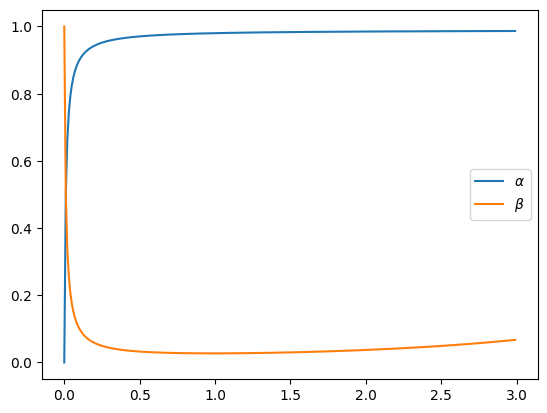

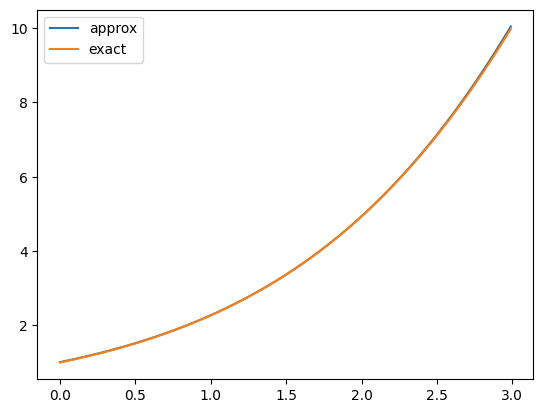

In [12]:
coefficients = [lambda x: 1, lambda x: -2, lambda x: 1]

x_start, y_start = 0, 1
x_end, y_end = 3, 0.5 * np.exp(3)
dx = 1e-2

solver = SecondOrderODESolver(coefficients, x_start, y_start, x_end, y_end, dx)
solver.solve()

solver.plot_coefficients()
solver.plot_solution()
